In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('Large_Logistic_Regression_Training_Data__Customer_Churn__-_4000_rows.csv')


In [5]:
data.head()

,Age,Income,Subscription_Length,Monthly_Spend,Support_Tickets,Target
0,3.080388,0.882084,-1.780168,2.244270,-0.830369,1
1,0.640370,-0.021924,-0.234630,0.167870,-1.022142,1
2,3.050756,1.332221,-2.665657,1.941544,0.623366,1
3,-2.354808,-0.581092,1.162812,-1.795818,0.917658,0
4,3.030007,1.243544,-2.498892,1.964410,0.362077,1


In [9]:
print(data.isnull().sum())
data.dropna(inplace=True)




Age                    0
Income                 0
Subscription_Length    0
Monthly_Spend          0
Support_Tickets        0
Target                 0
dtype: int64


In [11]:
X = data.drop('Target', axis=1)
y = data['Target']


In [12]:
X = pd.get_dummies(X, drop_first=True)


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [15]:
logreg = LogisticRegression(max_iter=1000, random_state=42)


In [16]:
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [17]:
y_pred = logreg.predict(X_test)


In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.52875


In [19]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.52      0.52      0.52       395
           1       0.53      0.53      0.53       405

    accuracy                           0.53       800
   macro avg       0.53      0.53      0.53       800
weighted avg       0.53      0.53      0.53       800



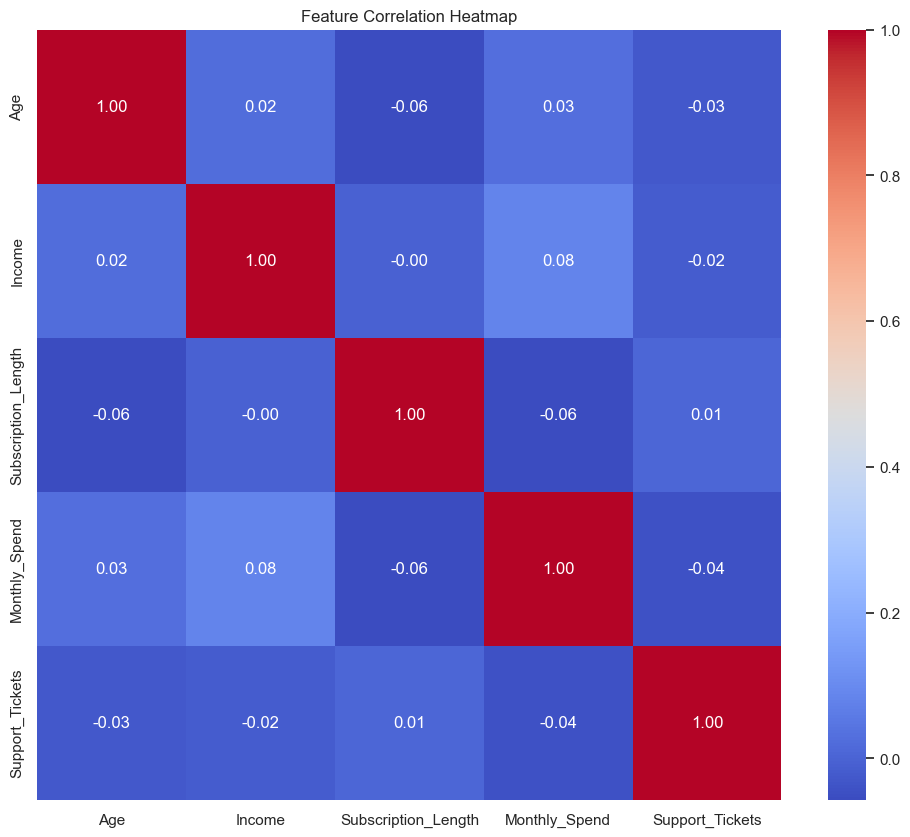

In [20]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set a consistent style
sns.set(style="whitegrid")

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(X).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


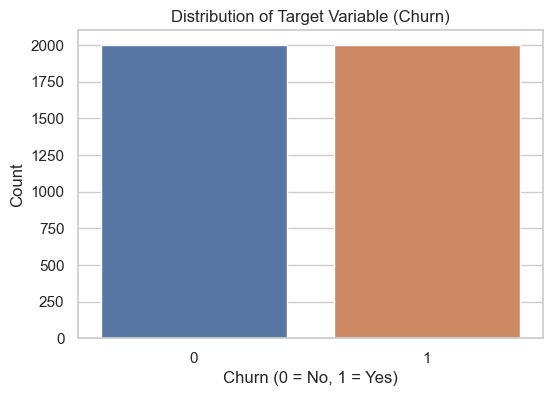

In [21]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Distribution of Target Variable (Churn)")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()



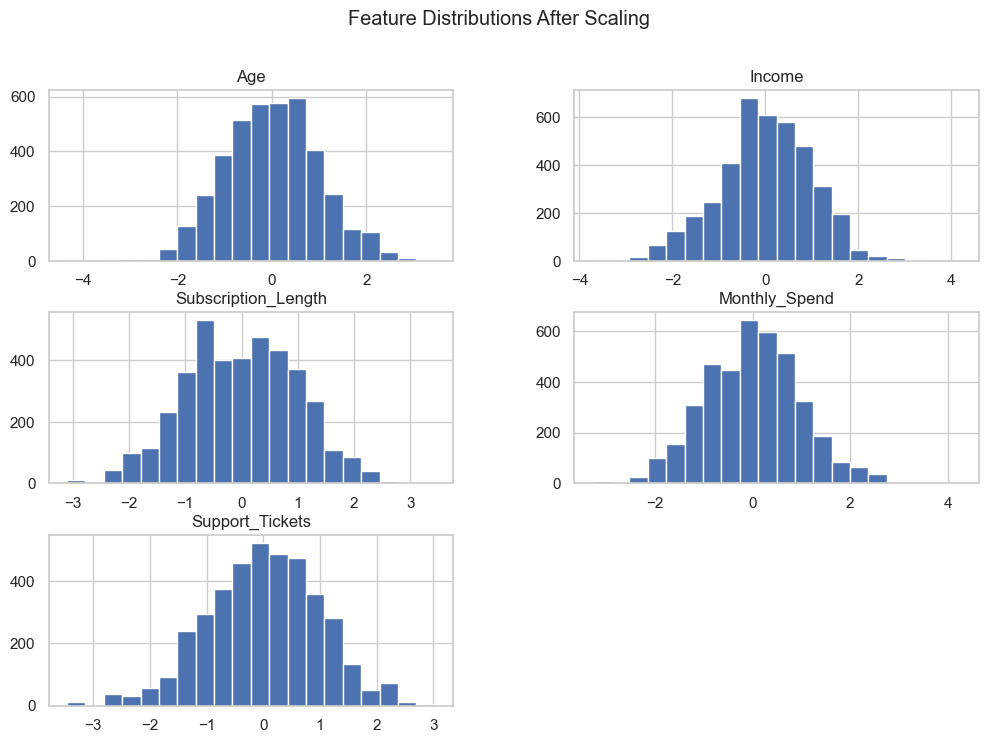

In [22]:
# Convert scaled features to a DataFrame for easy plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Plot histograms of the first few features after scaling
X_scaled_df.iloc[:, :6].hist(bins=20, figsize=(12, 8))
plt.suptitle("Feature Distributions After Scaling")
plt.show()


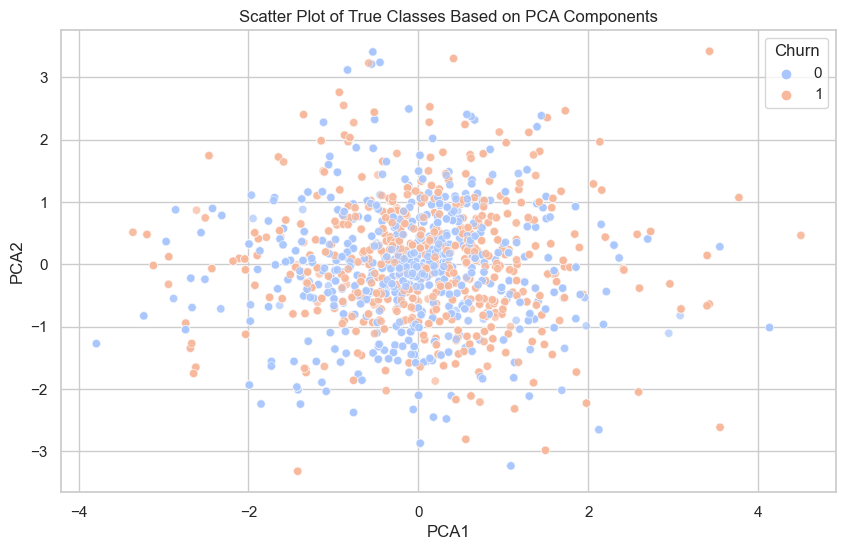

ValueError: X has 2 features, but LogisticRegression is expecting 5 features as input.

In [23]:
from sklearn.decomposition import PCA

# Reduce features to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Refit the model if necessary, then make predictions
y_pred = logreg.predict(X_test)

# Create a DataFrame with PCA components and predictions
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Churn'] = y.values

# Plot the scatter plot with true classes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Churn', palette='coolwarm', alpha=0.7)
plt.title("Scatter Plot of True Classes Based on PCA Components")
plt.show()

# Plot the scatter plot with predicted classes for comparison
pca_df['Predicted_Churn'] = logreg.predict(pca.transform(X_scaled))

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Predicted_Churn', palette='coolwarm', alpha=0.7)
plt.title("Scatter Plot of Predicted Classes Based on PCA Components")
plt.show()


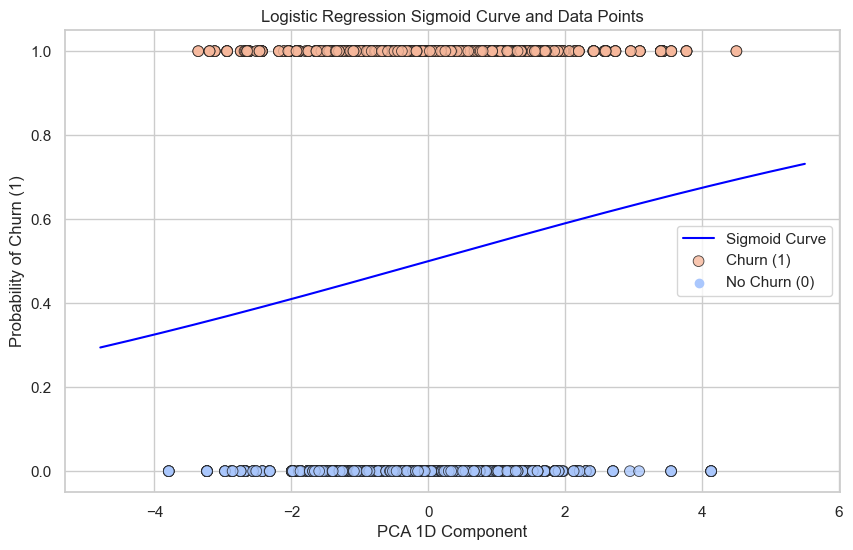

In [24]:
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Reduce the dataset to 1 component using PCA for visualization
pca_1d = PCA(n_components=1)
X_pca_1d = pca_1d.fit_transform(X_scaled)

# Fit the logistic regression model on the 1D PCA data for a clear sigmoid visualization
logreg_1d = LogisticRegression()
logreg_1d.fit(X_pca_1d, y)

# Get predicted probabilities for the sigmoid plot
X_range = np.linspace(X_pca_1d.min() - 1, X_pca_1d.max() + 1, 500).reshape(-1, 1)
y_probs = logreg_1d.predict_proba(X_range)[:, 1]

# Plot the sigmoid function
plt.figure(figsize=(10, 6))
plt.plot(X_range, y_probs, color="blue", label="Sigmoid Curve")

# Plot the data points (colored by true classes)
sns.scatterplot(x=X_pca_1d.flatten(), y=y, hue=y, palette="coolwarm", edgecolor="k", s=60, alpha=0.8)
plt.title("Logistic Regression Sigmoid Curve and Data Points")
plt.xlabel("PCA 1D Component")
plt.ylabel("Probability of Churn (1)")
plt.legend(["Sigmoid Curve", "Churn (1)", "No Churn (0)"])
plt.show()
